In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import openai
import yaml

from utils import *

import autoKG_full as AKG

In [2]:
with open("config.yaml", 'r') as stream:
    try:
        params = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)


COMPLETIONS_MODEL = params["OPENAI_API_MODEL"]
EMBEDDING_MODEL = params["EMBEDDING_MODEL"]
my_api_key = params["OPENAI_API_KEY"]
openai.api_key = my_api_key

os.environ['OPENAI_API_KEY'] = my_api_key
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

In [3]:
KG_class_chat = AKG.autoKG(texts=None,
                           source=None,
                           embedding_model=EMBEDDING_MODEL,
                           llm_model=COMPLETIONS_MODEL,
                           openai_api_key=OPENAI_API_KEY,
                           main_topic=None,
                           embedding=False)

In [4]:
KG_class_chat.load_data(os.path.join('KG_data', 'ref_paper_KG.npy'), include_texts=True)

Successfully load from KG_data\ref_paper_KG.npy


In [9]:
query = """
Please tell me how to use pre-trained language models to construct a knowledge graph.
"""
record = KG_class_chat.KG_prompt(query,
                                 search_nums=(15, 7, 3, 4, 2),
                                 search_mtd='pair_dist',
                                 use_u=False)
response, keywords_info, ref_info, all_tokens = KG_class_chat.completion_from_record(
                               record,
                               output_tokens=1024,
                               prompt_language='English',
                               show_prompt=False,
                               prompt_keywords=False,
                               include_source=False,
                               )

In [10]:
print(all_tokens)
print(response)


9803
Pre-trained language models (LMs) can be used to construct knowledge graphs (KGs) by leveraging the knowledge stored in the LMs. Here is a step-by-step guide on how to use pre-trained LMs for KG construction:

1. Unsupervised Approach: One approach is to use unsupervised methods like MAMA (designed by Wang et al.) or the method proposed by Hao et al. These approaches involve a single forward pass of the pre-trained LMs over a corpus without any fine-tuning. The LMs generate prompts that express the target relation in a diverse way. The prompts are then weighted with confidence scores, and the LM is used to search a large collection of candidate entity pairs. The top entity pairs obtained from this process are considered as the output knowledge for the KG.

2. Minimal User Input: Another approach, proposed by Hao et al., involves minimal user input. The user provides a minimal definition of the input relation as an initial prompt and some examples of entity pairs. The method then g

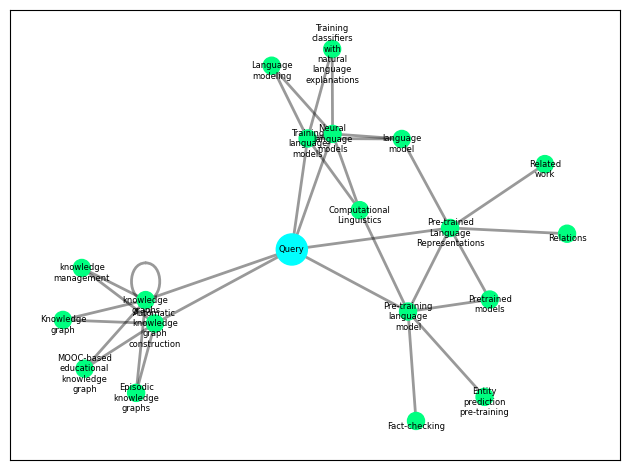

<Figure size 640x480 with 0 Axes>

In [11]:
KG_class_chat.draw_graph_from_record(record,
                                     node_colors=([0, 1, 1], [0, 1, 0.5], [1, 0.7, 0.75]),
                                     node_shape='o',
                                     edge_color='black',
                                     edge_widths=(2, 0.5),
                                     node_sizes=(500, 150, 50),
                                     font_color='black',
                                     font_size=6,
                                     show_text=False,
                                     save_fig=True,
                                     save_path='KG_outputs/Subgraph_vis.png')


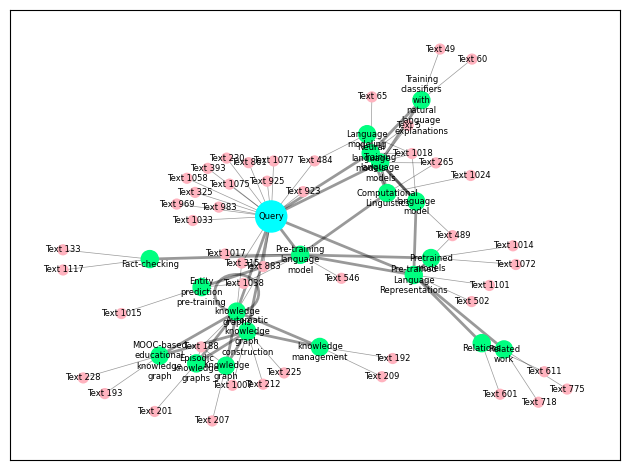

<Figure size 640x480 with 0 Axes>

In [13]:
KG_class_chat.draw_graph_from_record(record,
                                     node_colors=([0, 1, 1], [0, 1, 0.5], [1, 0.7, 0.75]),
                                     node_shape='o',
                                     edge_color='black',
                                     edge_widths=(2, 0.5),
                                     node_sizes=(500, 150, 50),
                                     font_color='black',
                                     font_size=6,
                                     show_text=True,
                                     save_fig=True,
                                     save_path='KG_outputs/Subgraph_vis_text.png')